# Test case: Taylor-Green vortex initial value problem

This is can be a resource intensive test depending on the number of resolution of the simulation. It is preferrable to execute this with MPI parallelization. Ideally we would do this as follows from the root of the fluidsim repository.

```sh
mpirun -np $(nproc) python doc/test_cases/Taylor_Green_vortices/run_simul.py
```

## Preparation

Instead we are executing the script within a IPython kernel inside a Jupyter notebook, we require ``ipyparallel`` backend launched in the background by running:

```sh
ipcluster start -n $(nproc) --engines=MPIEngineSetLauncher
```

or from another IPython kernel

```python
!{sys.executable} -m ipyparallel.apps.ipclusterapp start -n $(nproc) --engines=MPIEngineSetLauncher
```

And then we connect to the MPI engine.

In [1]:
import ipyparallel as ipp
rc = ipp.Client()
dview = rc[:]

Afterwards, we will execute all cells in parallel so we always need to add the magic command ``%%px``.

## Initialize parameters

The following script was loaded by running `%load doc/test_cases/Taylor_Green_vortices/run_simul.py` and slightly modified to use a higher resolution (`nx`).

In [2]:
%%px
"""Taylor-Green Vortex at Re = 1600
===================================

https://www.grc.nasa.gov/hiocfd/wp-content/uploads/sites/22/case_c3.3.pdf


"""

import numpy as np

from fluidsim.solvers.ns3d.solver import Simul

params = Simul.create_default_params()

Re = 1600
V0 = 1.0
L = 1
params.nu_2 = V0 * L / Re

params.init_fields.type = "in_script"

params.time_stepping.t_end = 20.0 * L / V0

nx = 96
params.oper.nx = params.oper.ny = params.oper.nz = nx
lx = params.oper.Lx = params.oper.Ly = params.oper.Lz = 2 * np.pi * L

params.output.periods_save.phys_fields = 4
params.output.periods_save.spatial_means = 0.2
params.output.periods_save.spectra = 0.5

sim = Simul(params)

X, Y, Z = sim.oper.get_XYZ_loc()

vx = V0 * np.sin(X / L) * np.cos(Y / L) * np.cos(Z / L)
vy = -V0 * np.cos(X / L) * np.sin(Y / L) * np.cos(Z / L)
vz = sim.oper.create_arrayX(value=0)

sim.state.init_statephys_from(vx=vx, vy=vy, vz=vz)

sim.state.statespect_from_statephys()
sim.state.statephys_from_statespect()

[stdout:0] 
*************************************
Program fluidsim
Manual initialization of the fields is selected. Do not forget to initialize them.
sim:                <class 'fluidsim.solvers.ns3d.solver.Simul'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>

solver ns3d, RK4 and parallel (6 proc.)
type fft: fluidfft.fft3d.mpi_with_fftwmpi3d
nx =     96 ; ny =     96 ; nz =     96
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/scratch/avmo/tmp/ns3d_96x96x96_V2pix2pix2pi_2019-01-15_14-17-34
init_fields.type: in_script



To preview the initialization one could do the following before time stepping. This is only useful to plot fields, and only recommended when run sequentially.

```python
%matplotlib inline
sim.output.init_with_initialized_state()
sim.output.phys_fields.plot(equation=f'x={{sim.oper.Lx/4}}')
```

## Run the simulation

In [3]:
%%px --no-verbose
sim.time_stepping.start()

[stdout:0] 
Initialization outputs:
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields3d.PhysFieldsBase3D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns3d.output.spatial_means.SpatialMeansNS3D'>
sim.output.spectra:           <class 'fluidsim.solvers.ns3d.output.spectra.SpectraNS3D'>

Memory usage at the end of init. (equiv. seq.): 1285.1171875 Mo
Size of state_spect (equiv. seq.): 21.676032 Mo
*************************************
Beginning of the computation
save state_phys in file state_phys_t000.000.nc
    compute until t =         20
it =      0 ; t =          0 ; deltat  =   0.032725
              energy = 1.250e-01 ; Delta energy = +0.000e+00

it =     32 ; t =    1.00953 ; deltat  =   0.030018
              energy = 1.245e-01 ; Delta energy = -4.897e-04
              estimated remaining duration =       345 s
it =     67 ; t =    2.02202 ; deltat  =   0.027502
              energy = 1.239e-01 ; Delta energy = -6.092e-04
              estimated re

In [4]:
%%px -t 0
sim.output.path_run

Out[0:3]: '/scratch/avmo/data/ns3d_96x96x96_V2pix2pix2pi_2019-01-15_14-17-34'

## Load the simulation, sequentially, for visualizing the results

Set some nice defaults for `matplotlib`.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rc("figure", dpi=100)

In [6]:
import fluidsim as fs
sim = fs.load_state_phys_file("/scratch/avmo/data/ns3d_96x96x96_V2pix2pix2pi_2019-01-15_14-17-34")

*************************************
Program fluidsim
Load state from file:
[...]/data/ns3d_96x96x96_V2pix2pix2pi_2019-01-15_14-17-34/state_phys_t020.030.nc
sim:                <class 'fluidsim.solvers.ns3d.solver.Simul'>
sim.oper:           <class 'fluidsim.operators.operators3d.OperatorsPseudoSpectral3D'>
sim.output:         <class 'fluidsim.solvers.ns3d.output.Output'>
sim.state:          <class 'fluidsim.solvers.ns3d.state.StateNS3D'>
sim.time_stepping:  <class 'fluidsim.solvers.ns3d.time_stepping.TimeSteppingPseudoSpectralNS3D'>
sim.init_fields:    <class 'fluidsim.solvers.ns3d.init_fields.InitFieldsNS3D'>

solver ns3d, RK4 and sequential,
type fft: fluidfft.fft3d.with_pyfftw
nx =     96 ; ny =     96 ; nz =     96
Lx = 2pi ; Ly = 2pi ; Lz = 2pi
path_run =
/scratch/avmo/data/ns3d_96x96x96_V2pix2pix2pi_2019-01-15_14-17-34
init_fields.type: from_file

Initialization outputs:
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields3d.PhysFieldsBase3D'>
sim.output.spati

### A cross-section of the z-component of vorticity

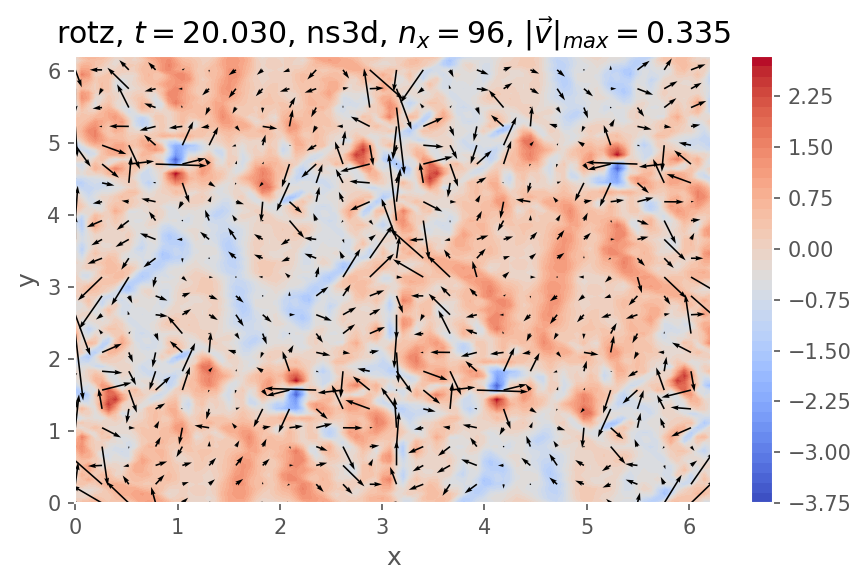

In [7]:
%matplotlib inline
plt.figure(0, dpi=150)
sim.output.phys_fields.plot(equation=f'x={sim.oper.Lx/4}', numfig=0, nb_contours=50, cmap="coolwarm")

### Spatially averaged energy, enstrophy and their dissipation rates

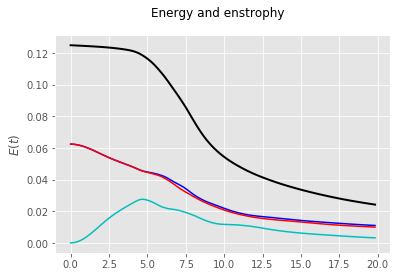

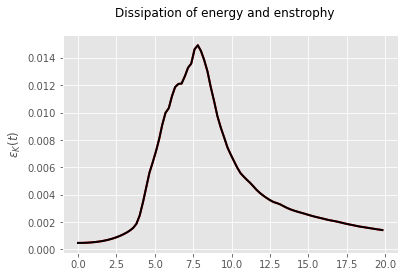

In [8]:
sim.output.spatial_means.plot()

### Compensated kinetic energy spectra

plot1d(tmin=15, tmax=20, delta_t=None, coef_compensate=1.667)
plot 1D spectra
    tmin =  14.8653 ; tmax =   19.627 ; delta_t = None
    imin =       29 ; imax =       38 ; delta_i = None


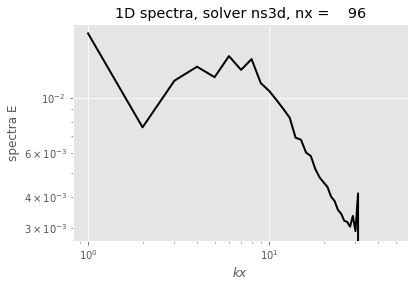

In [9]:
sim.output.spectra.plot1d(tmin=15, tmax=20, coef_compensate=5/3)